In [22]:
import pandas as pd
import seaborn as sns
trl=pd.read_csv('trial3.csv')
trl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   proj_id                  304 non-null    int64  
 1   project_title            304 non-null    object 
 2   team_members             304 non-null    int64  
 3   time_weeks               304 non-null    int64  
 4   presentation_score(1-5)  304 non-null    float64
 5   invigilators_review      304 non-null    object 
 6   review_sentiment         304 non-null    float64
 7   Project_Overall_score    304 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 19.1+ KB


In [23]:
import pandas as pd

trl=pd.read_csv('trial3.csv')
trl.head()


,proj_id,project_title,team_members,time_weeks,presentation_score(1-5),invigilators_review,review_sentiment,Project_Overall_score
0,2001,Diabetes detection ML project,3,7,4.5,Great job on completing the project within th...,0.6249,88.6049
1,2002,Developing a marketing strategy for a new pro...,2,6,4.3,The team showed excellent technical skills an...,0.5719,85.0719
2,2003,Creating a business plan for a social enterprise,3,3,4.4,Well-organized and structured project plan.,0.0000,87.6000
3,2004,Designing a sustainable packaging solution fo...,3,7,4.4,Impressive presentation skills and clear commu...,0.7096,86.7596
4,2005,Implementing a customer satisfaction survey a...,2,8,3.7,Attention to detail in project implementation ...,0.0000,72.0900


In [24]:
trl.describe()


,proj_id,team_members,time_weeks,presentation_score(1-5),review_sentiment,Project_Overall_score
count,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2152.50000,2.898026,6.328947,3.902961,0.444046,77.118106
std,87.90146,1.261042,1.580727,0.727052,0.249468,14.140459
min,2001.00000,1.000000,2.000000,1.500000,-0.273200,29.840000
25%,2076.75000,2.000000,5.000000,3.600000,0.381800,70.731900
50%,2152.50000,3.000000,7.000000,4.000000,0.476700,79.411300
75%,2228.25000,4.000000,8.000000,4.500000,0.636900,88.670800
max,2304.00000,6.000000,8.000000,4.900000,0.790600,97.321500


In [25]:
import pandas as pd

# Exclude non-numeric columns from correlation calculation
numeric_columns = trl.select_dtypes(include=[float, int]).columns
trl_numeric = trl[numeric_columns]

# Calculate the correlation matrix
corr_check = trl_numeric.corr()

# Sort the correlation values for the 'Project_Overall_score' column in descending order
correlation_scores = corr_check['Project_Overall_score'].sort_values(ascending=False)

print(correlation_scores)


Project_Overall_score      1.000000
presentation_score(1-5)    0.999106
team_members               0.689143
review_sentiment           0.181682
proj_id                    0.041445
time_weeks                -0.044496
Name: Project_Overall_score, dtype: float64


## presentation_score(1-5)=    0.999106
## time_weeks       =     -0.044496

 
 ## Here presentation_score shows strong positive correlation  on project_overall_score.The good will be presentation, the more will be marks while project completion time has strong negative correlation i.e team taking less time to complete the project seems to  score more marks.

<Axes: xlabel='presentation_score(1-5)', ylabel='Project_Overall_score'>

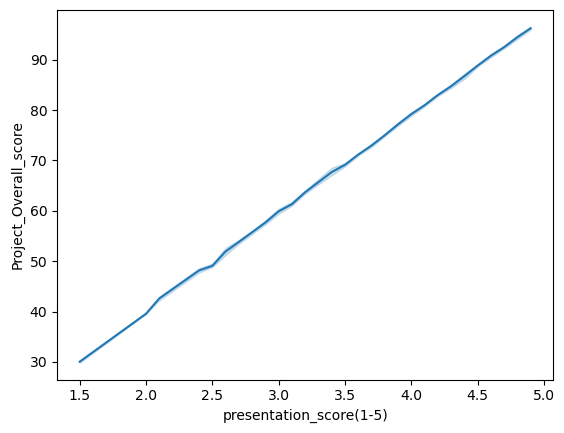

In [26]:
import seaborn as sns
sns.lineplot(x=trl['presentation_score(1-5)'],y=trl['Project_Overall_score'])

## Here the above lineplot shows that the presentation score is directly proportional to the project's overall score.

<Axes: xlabel='time_weeks', ylabel='Project_Overall_score'>

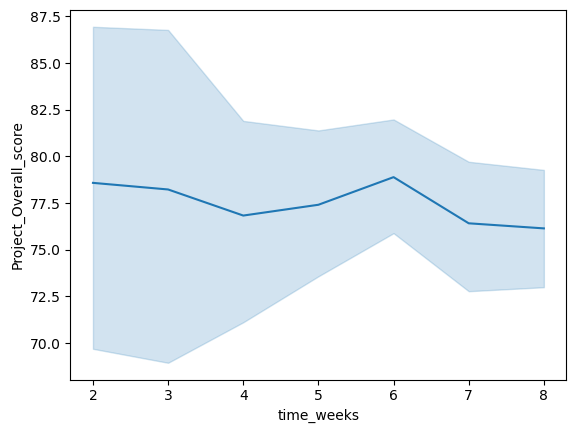

In [27]:

sns.lineplot(x=trl['time_weeks'],y=trl['Project_Overall_score'])

## The above's lineplot indicates that the team/project taking less time to complete the project seems to score better.

<Axes: xlabel='team_members', ylabel='Project_Overall_score'>

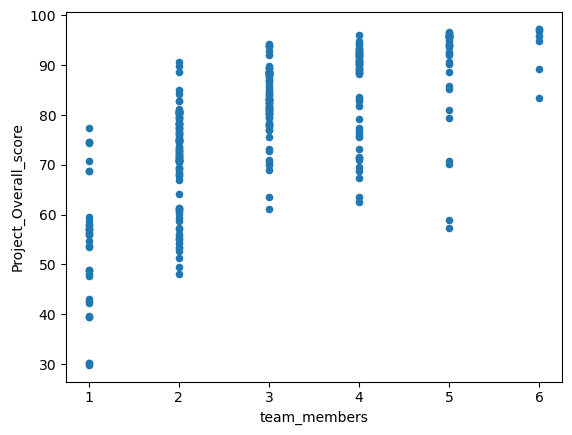

In [28]:
trl.plot(kind='scatter', x='team_members',y='Project_Overall_score')

## The above graph shows that a strong team collaboration with their varied ideas and findings leads to a complete and successful project. 

<Axes: xlabel='review_sentiment', ylabel='Project_Overall_score'>

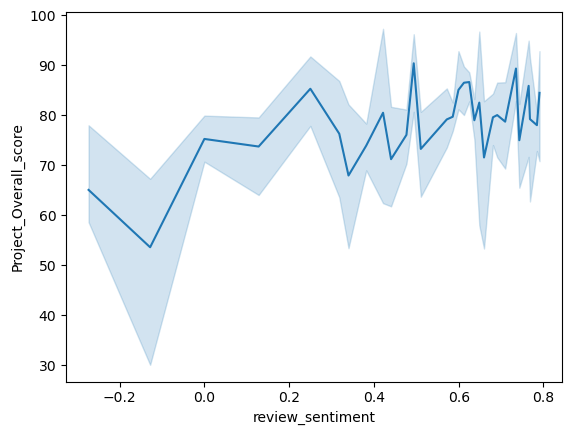

In [29]:

sns.lineplot(x=trl['review_sentiment'],y=trl['Project_Overall_score'])

In [30]:
import numpy as np
import pandas as pd

data=pd.read_csv('trial3.csv')

X = data[['team_members','time_weeks','presentation_score(1-5)']]
y = data['Project_Overall_score']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse=sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

new_data = pd.DataFrame({
    'team_members': [3],  # Provide the values for the features in your new data
    'time_weeks': [7],
    'presentation_score(1-5)': [4.5],
    
})

# Make predictions on the new   data
new_data_pred = model.predict(new_data)

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
review = " Great job on completing the project within the given timeframe."

# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(review)

# Get the compound sentiment score
compound_score = sentiment_scores['compound']
print("Sentiment Compound Score:", compound_score)

new_data_pred = model.predict(new_data)
predicted_score = new_data_pred[0]

predicted_score=predicted_score+compound_score
print("Predicted Project Overall Score:", predicted_score)

if predicted_score >=90:
    print("Wow! This team is well enough to be hired.")
elif predicted_score >50 and predicted_score < 90:
    print("Satisfactory. More extra effort is needed to this team. ")
elif predicted_score<50:
    print("sorry! Low performance")
    
    # Checking accuracy using R-squared score
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Accuracy: {accuracy}%")
    
  

Mean Squared Error (MSE): 33.375992970662246
Root Mean Squared Error (RMSE): 5.777195943592552
R-squared: 0.8081052928779348
Sentiment Compound Score: 0.6249
Predicted Project Overall Score: 87.51389580086435
Satisfactory. More extra effort is needed to this team. 
Accuracy: 80.81052928779347%


In [31]:
print(X_train.shape)
print(X_test.shape)

(243, 3)
(61, 3)


In [32]:
import pandas as pd  
data=pd.read_csv('trial3.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming you have your dataset in a pandas DataFrame named 'data'
# The 'Project_Overall_score' column is the target variable

# Splitting the data into training and testing sets
X = data[['team_members','time_weeks','presentation_score(1-5)']]  # Features
y = data['Project_Overall_score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse=sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

new_data = pd.DataFrame({
    'team_members': [3],  # Provide the values for the features in your new data
    'time_weeks':[7],
    'presentation_score(1-5)': [4.5],
    
})

# Make predictions on the new data
new_data_pred = model.predict(new_data)

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
review = " Great job on completing the project within the given timeframe."

# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(review)

# Get the compound sentiment score
compound_score = sentiment_scores['compound']
print("Sentiment Compound Score:", compound_score)

predicted_score=predicted_score+compound_score

print("Predicted Project Overall Score:", predicted_score)

if predicted_score >=90:
    print("Wow! This team is well enough to be hired.")
elif predicted_score >50 and predicted_score < 90:
    print("Satisfactory. More extra effort is needed to this team. ")
elif predicted_score<50:
    print("sorry! Low performance")
    
    # Checking accuracy using R-squared score
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Accuracy: {accuracy}%")

Mean Squared Error: 0.456848283688561
Root Mean Squared Error: 0.6759055286713972
R-squared Score: 0.9978040043843509
Sentiment Compound Score: 0.6249
Predicted Project Overall Score: 88.13879580086434
Satisfactory. More extra effort is needed to this team. 
Accuracy: 99.7804004384351%


In [33]:
print(X_train.shape)
print(X_test.shape)

(182, 3)
(122, 3)


In [34]:
import numpy as np
import pandas as pd

data=pd.read_csv('trial3.csv')

X = data[['team_members','time_weeks','presentation_score(1-5)']]
y = data['Project_Overall_score']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.tree import DecisionTreeRegressor

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse=sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

new_data = pd.DataFrame({
    'team_members': [3],  # Provide the values for the features in your new data
    'time_weeks': [7],
    'presentation_score(1-5)': [4.5],
    
})

# Make predictions on the new data
new_data_pred = model.predict(new_data)

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
review = " Great job on completing the project within the given timeframe."

# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(review)

# Get the compound sentiment score
compound_score = sentiment_scores['compound']
print("Sentiment Compound Score:", compound_score)

predicted_score=predicted_score+compound_score

print("Predicted Project Overall Score:", predicted_score)


new_data_pred = model.predict(new_data)

predicted_score = new_data_pred[0]



if predicted_score >=90:
    print("Wow! This team is well enough to be hired.")
elif predicted_score >50 and predicted_score < 90:
    print("Satisfactory. More extra effort is needed to this team. ")
elif predicted_score<50:
    print("sorry! Low performance")
    
    # Checking accuracy using  R-squared score
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Accuracy: {accuracy}%")

Mean Squared Error (MSE): 0.3340673202234969
Root Mean Squared Error (RMSE): 0.5779855709474908
R-squared: 0.9983941925651568
Sentiment Compound Score: 0.6249
Predicted Project Overall Score: 88.76369580086434
Satisfactory. More extra effort is needed to this team. 
Accuracy: 99.83941925651568%


In [35]:
print(X_train.shape)
print(X_test.shape)

(182, 3)
(122, 3)


In [36]:

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
review = " Great job on completing the project within the given timeframe."
# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(review)

# Print the sentiment scores
print(sentiment_scores)


{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the required lexicon
nltk.download('vader_lexicon')

# Read the data from CSV
data = pd.read_csv('trial3.csv')

X = data[['team_members', 'time_weeks', 'presentation_score(1-5)']]
y = data['Project_Overall_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Create new data for prediction
new_data = pd.DataFrame({
    'team_members': [3],
    'time_weeks': [7],
    'presentation_score(1-5)': [4.5],
})

# Make predictions on the new data
new_data_pred = model.predict(new_data)
predicted_score = new_data_pred[0]


# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
review = " Great job on completing the project within the given timeframe."

# Perform sentiment analysis
sentiment_scores = analyzer.polarity_scores(review)

# Get the compound sentiment score
compound_score = sentiment_scores['compound']
print("Sentiment Compound Score:", compound_score)

predicted_score=predicted_score+compound_score

print("Predicted Project Overall Score:", predicted_score)



# Providing a message based on the predicted score
if predicted_score>= 90:
    print("Wow! This team is well enough to be hired.")
elif predicted_score > 50 and predicted_score < 90:
    print("Satisfactory. More extra effort is needed by this team.")
elif predicted_score < 50:
    print("Sorry! Low performance.")
    
    # Checking accuracy using R-squared
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Accuracy: {accuracy}%")


Mean Squared Error (MSE): 0.053130280377183245
Root Mean Squared Error (RMSE): 0.2305000658940974
R-squared: 0.9997446113580104
Sentiment Compound Score: 0.6249
Predicted Project Overall Score: 89.09904191862121
Satisfactory. More extra effort is needed by this team.
Accuracy: 99.97446113580104%


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
print(X_train.shape)
print(X_test.shape)

(182, 3)
(122, 3)


In [39]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Read the CSV file
trl = pd.read_csv('trial3.csv')

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate the compound sentiment score for a given feedback
def calculate_sentiment_score(feedback):
    sentiment_scores = analyzer.polarity_scores(feedback)
    compound_score = sentiment_scores['compound']
    return compound_score

# Apply sentiment analysis to the 'mentors_feedback' column and create a new column for sentiment scores
data['sentiment_score'] = data['mentors_review'].apply(calculate_sentiment_score)

# Print the updated dataframe
print(data)


KeyError: 'mentors_review'

In [ ]:
import pandas as pd
dff=pd.read_csv('original.csv')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   proj_id                  297 non-null    int64  
 1   project_title            297 non-null    object 
 2   team_members             297 non-null    int64  
 3   time(in weeks)           297 non-null    int64  
 4   presentation_score(1-5)  297 non-null    float64
 5   mentors_feedback         297 non-null    object 
 6   Project_Overall_score    297 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 16.4+ KB


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Read the CSV file
dff = pd.read_csv('original.csv')

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate the compound sentiment score for a given feedback
def calculate_sentiment_score(feedback):
    sentiment_scores = analyzer.polarity_scores(feedback)
    compound_score = sentiment_scores['compound']
    return compound_score

# Apply sentiment analysis to the 'mentors_feedback' column and create a new column for sentiment scores
dff['sentiment_score'] = dff['mentors_feedback'].apply(calculate_sentiment_score)

# Export the dataframe to an Excel file
dff.to_excel('sentiment_scores.xlsx', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the required lexicon
nltk.download('vader_lexicon')

# Read the data from CSV
data = pd.read_csv('trial3.csv')

X = data[['team_members', 'time_weeks', 'presentation_score(1-5)']]
y = data['Project_Overall_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Accuracy: {accuracy}%")


Mean Squared Error (MSE): 0.053130280377183245
Root Mean Squared Error (RMSE): 0.2305000658940974
Accuracy: 99.97446113580104%


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
